<a href="https://colab.research.google.com/gist/luc-leonard/f3c2fcb497567b2a9e15ecc62edae5e4/vq-diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VQ-Diffusion
by @nev#4905

In [1]:
#@markdown note: it will take ±10 minutes to download and install everyting

In [2]:
# %%capture
# #@title install dependencies
# !pip install omegaconf pytorch-lightning
# !pip install timm==0.3.4
# !pip install tensorboard==1.15.0 
# !pip install lmdb tqdm --no-cache-dir
# !pip install einops ftfy
# !pip install git+https://github.com/openai/DALL-E

In [4]:
# %%capture
# #@title get the library
# !git clone https://github.com/microsoft/VQ-Diffusion
%cd VQ-Diffusion

/home/lleonard/dev/perso/clip_generators/clip_generators/models/vq-diffusion/VQ-Diffusion


In [6]:
# #@title download model
model_name = "human_pretrained"  #@param {type: "string"} ["CC_pretrained", "coco_pretrained", "cub_pretrained"]
vqgan_name = "taming_f8_8192_openimages_last"  #@param {type: "string"} ["taming_f8_8192_openimages_last"]
model_name += ".pth"
vqgan_name += ".ckpt"

# #!sudo apt install --yes aria2 > /dev/null 2> /dev/null
# !aria2c https://facevcstandard.blob.core.windows.net/t-shuygu/release_model/VQ-Diffusion/pretrained_model/{model_name} --auto-file-renaming=false
# !aria2c https://facevcstandard.blob.core.windows.net/t-shuygu/release_model/VQ-Diffusion/pretrained_model/taming_dvae/{vqgan_name} --auto-file-renaming=false
# !aria2c https://facevcstandard.blob.core.windows.net/t-shuygu/release_model/VQ-Diffusion/pretrained_model/ViT-B-32.pt --auto-file-renaming=false -o OUTPUT/pretrained_model/ViT-B-32.pt

In [7]:
#@title load model
# open("my_config.yaml", 'w').write(
#     open("configs/cc15m_930.yaml").read()
#     .replace("OUTPUT/pretrained_model/taming_dvae/taming_f8_8192_openimages_last.ckpt", vqgan_name))
from inference_VQ_Diffusion import VQ_Diffusion
VQ_Diffusion_model = VQ_Diffusion(config="my_config.yaml", path=model_name)

Working with z of shape (1, 256, 32, 32) = 262144 dimensions.


/home/lleonard/.cache/pypoetry/virtualenvs/clip-generators-W525Pgsi-py3.8/lib/python3.8/site-packages/torchvision/transforms/transforms.py:287: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


{'overall': {'trainable': '370.77M', 'non_trainable': '126.29M', 'total': '497.06M'}, 'content_codec': {'trainable': '0', 'non_trainable': '65.8M', 'total': '65.8M'}, 'condition_codec': {'trainable': '0', 'non_trainable': '0', 'total': '0'}, 'transformer': {'trainable': '370.77M', 'non_trainable': '60.49M', 'total': '431.26M'}}
Model missing keys:
 []
Model unexpected keys:
 ['transformer.log_alpha', 'transformer.log_1_min_alpha', 'transformer.log_cumprod_alpha', 'transformer.log_1_min_cumprod_alpha']
Evaluate EMA model


In [ ]:
!nvidia-smi

In [26]:
#@title generate images
from IPython.display import display
from tqdm.auto import trange
from PIL import Image
import numpy as np
import torch
import gc


gc.collect()
torch.cuda.empty_cache()
prompt = "The eiffel tower made of legos"  #@param {type: "string"}
truncation_rate = 0.85  #@param {type: "number"}
num_pictures = 4  #@param {type: "integer"}
batch_size = 4  #@param {type: "integer"}


def generate(promt):
    print(prompt)
    for i in trange(0, num_pictures, batch_size):
        with torch.inference_mode():
            VQ_Diffusion_model.inference_generate_sample_with_condition(
                prompt,
                truncation_rate=0.85, 
                save_root="results",
                batch_size=batch_size,
                fast=True)
        pics = []
        i = 0
        for j in range(i, i + batch_size):
            pics.append(Image.open(f"results/{prompt}/{j:06}.png"))
        display(Image.fromarray(np.concatenate(pics, axis=1)))
        # pics = np.asarray(pics).reshape((int(batch_size ** 0.5), -1,) + pics[0].size)
        # display(Image.fromarray(np.concatenp.concatenate(pics, axis=1)))
        # print(pics.shape)

A banana


  0%|          | 0/1 [00:00<?, ?it/s]

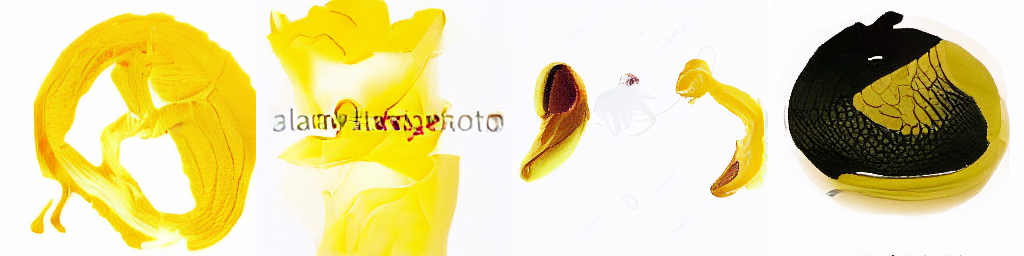

In [28]:
prompt = "A banana"
generate(prompt)